# OPTIMIZING MODEL PARAMETERS

This [tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html) is also, also, also given a webpage.

This will mostly just be another example at a nerual network.

I wrote some (very sparse) notes on optimizers in Overleaf. I think that the main take-away is that Adam is the best optimizer most of the time.
But SGD (Stochastic Gradient Descent) might be faster sometimes. It atleast doesn't require as much computational power.


## Ensue a lot of code


In [19]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

## The Hyperparameters

I wrote a great big note on this as well.

Short explanation:
They are parameters that, by tuning them, lets you optimize the way the model optimizes. The following three are (propably) the most common of hyperparemters.

* **Epochs** the numer of times that the model goes through all of the training data in the learning process.
* **Batch Size** the number of observations (datapoints), also the size of the batch, that goes through the newtork before the weights are updated.
* **Learning Rate** how much the weights are updated after each batch/ epoch.
Smaller learnings rates are slow, but high learning rates might divergce from a global minimum.

In [20]:
learning_rate = 1e-3
batch_size = 64
epochs = 20

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

# We pick the SGD optimizer for now.
# But here we actually tried the Adam optimizer with great success.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Train and Test loop

Then the code for the training and the testing loop.

In [21]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

## Executing it all

Finally the code to actually execute the model, and train- and test loop we wrote:


In [22]:

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298959  [    0/60000]
loss: 0.577881  [ 6400/60000]
loss: 0.398128  [12800/60000]
loss: 0.483586  [19200/60000]
loss: 0.460194  [25600/60000]
loss: 0.446704  [32000/60000]
loss: 0.384780  [38400/60000]
loss: 0.506169  [44800/60000]
loss: 0.505709  [51200/60000]
loss: 0.500542  [57600/60000]
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.428353 

Epoch 2
-------------------------------
loss: 0.270128  [    0/60000]
loss: 0.364951  [ 6400/60000]
loss: 0.281438  [12800/60000]
loss: 0.403278  [19200/60000]
loss: 0.395632  [25600/60000]
loss: 0.379442  [32000/60000]
loss: 0.324930  [38400/60000]
loss: 0.474144  [44800/60000]
loss: 0.440202  [51200/60000]
loss: 0.457556  [57600/60000]
Test Error: 
 Accuracy: 85.4%, Avg loss: 0.395458 

Epoch 3
-------------------------------
loss: 0.210494  [    0/60000]
loss: 0.333922  [ 6400/60000]
loss: 0.227882  [12800/60000]
loss: 0.331185  [19200/60000]
loss: 0.372771  [25600/60000]
loss: 0.352553  [32000/600

## Saving the model
Just so it does not have to be trained each time!

In [23]:
torch.save(model, 'model.pth')

## Evaluation of the model!

Yeah... what it says. Lets evaluate the model on the data!

Predicted: 'Coat', Actual: 'Shirt'


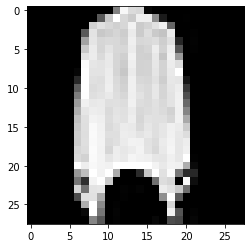

In [46]:
import matplotlib.pyplot as plt

# Defining the classes for 
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()

# The data is formatted as a matrix (so to speak), 
# it is 10.000 observations with their labels.
# So at the first row, the first column is this big 28 x 28 tensor image,
# and the second column at the first row is it's corresponding label.
N_DataPoints = len(test_data)

sample_idx = torch.randint(N_DataPoints, size=(1,)).item()
x, y = test_data[sample_idx][0], test_data[sample_idx][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f"Predicted: '{predicted}', Actual: '{actual}'")

# print(f"Random number: {sample_idx} \nNumber o datapoints: {N_DataPoints}")
tensor_im = test_data[sample_idx][0]
reshaped_im = tensor_im.view(tensor_im.shape[1], tensor_im.shape[2], tensor_im.shape[0])

# Actually showing the image:
plt.imshow(reshaped_im, cmap='gray')
plt.show()

In [25]:
print(pred)
print(pred[0].argmax())
a = pred[0].argmax()
print(a + 2)
bla = list(range(10))
print(bla[a + 2])

tensor([[-23.8287,  37.9768, -33.8225, -20.7378, -30.7520, -58.0915, -20.0393,
         -78.8957, -26.9773, -54.2201]])
tensor(1)
tensor(3)
3


## Notes

It seemed like depth of the Network didn't matter much. And the learning rate just slowed it down, it still achieved the same accuracy.

For this example, at least, it seemed like it was the amount of epochs which were critical. 
For further development we should probably have a look at Bayesian-optimization.